# **FUNGSI AKTIVASI PADA JARINGAN SARAF**

Fungsi aktivasi adalah pemetaan non-linear yang diterapkan pada output linear neuron:

  z = w^T x + b
  a = φ(z)

Tanpa fungsi aktivasi yang non-linear, jaringan saraf hanya menjadi transformasi linear, sehingga tidak mampu mempelajari pola yang kompleks.

Pada notebook ini kita akan:
 1. Mengenal beberapa fungsi aktivasi populer (Sigmoid, Tanh, ReLU, LeakyReLU, Softmax).
 2. Melihat bentuk kurva masing-masing fungsi.
 3. Mencoba fungsi aktivasi pada tensor sederhana
 4. Mencoba fungsi aktivasi di dalam model PyTorch kecil.

## 1. Import Library

In [14]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# Mengatur tampilan plot agar lebih tajam
plt.rcParams["figure.dpi"] = 120


## 2. Definisi Fungsi Aktivasi (Manual dan Versi PyTorch)

Di bagian ini kita akan:
- Membuat fungsi aktivasi secara manual (dengan operasi dasar).
- Menunjukkan padanan resminya di `torch.nn` untuk dipakai di model.


In [22]:
def step(x: torch.Tensor) -> torch.Tensor:
    """
    Fungsi aktivasi step (Heaviside).
    Menghasilkan 1 jika x >= 0, dan 0 jika x < 0.
    """
    return (x >= 0).float()


def sigmoid(x: torch.Tensor) -> torch.Tensor:
    """
    Fungsi aktivasi sigmoid.
    Output berada di antara 0 dan 1.
    """
    return 1.0 / (1.0 + torch.exp(-x))


def relu_fn(x: torch.Tensor) -> torch.Tensor:
    """
    Fungsi aktivasi ReLU.
    Menghasilkan 0 jika x < 0 dan x jika x >= 0.
    """
    return torch.maximum(torch.zeros_like(x), x)


def leaky_relu_fn(x: torch.Tensor, alpha: float = 0.1) -> torch.Tensor:
    """
    Fungsi aktivasi Leaky ReLU.
    Memberikan gradien kecil (alpha) pada sisi negatif.
    """
    return torch.where(x >= 0, x, alpha * x)


# -----------------------------
# PADANAN DI TORCH.NN
# -----------------------------
sigmoid_layer = nn.Sigmoid()
relu_layer    = nn.ReLU()
leaky_layer   = nn.LeakyReLU(negative_slope=0.1)

print("Contoh layer aktivasi yang tersedia di torch.nn:")
print(sigmoid_layer)
print(relu_layer)
print(leaky_layer)

Contoh layer aktivasi yang tersedia di torch.nn:
Sigmoid()
ReLU()
LeakyReLU(negative_slope=0.1)



## 3. Visualisasi Kurva Fungsi Aktivasi

 Kita buat domain x dari -5 sampai 5, lalu gambarkan:
 - Step
 - Sigmoid
 - ReLU
 - Leaky ReLU


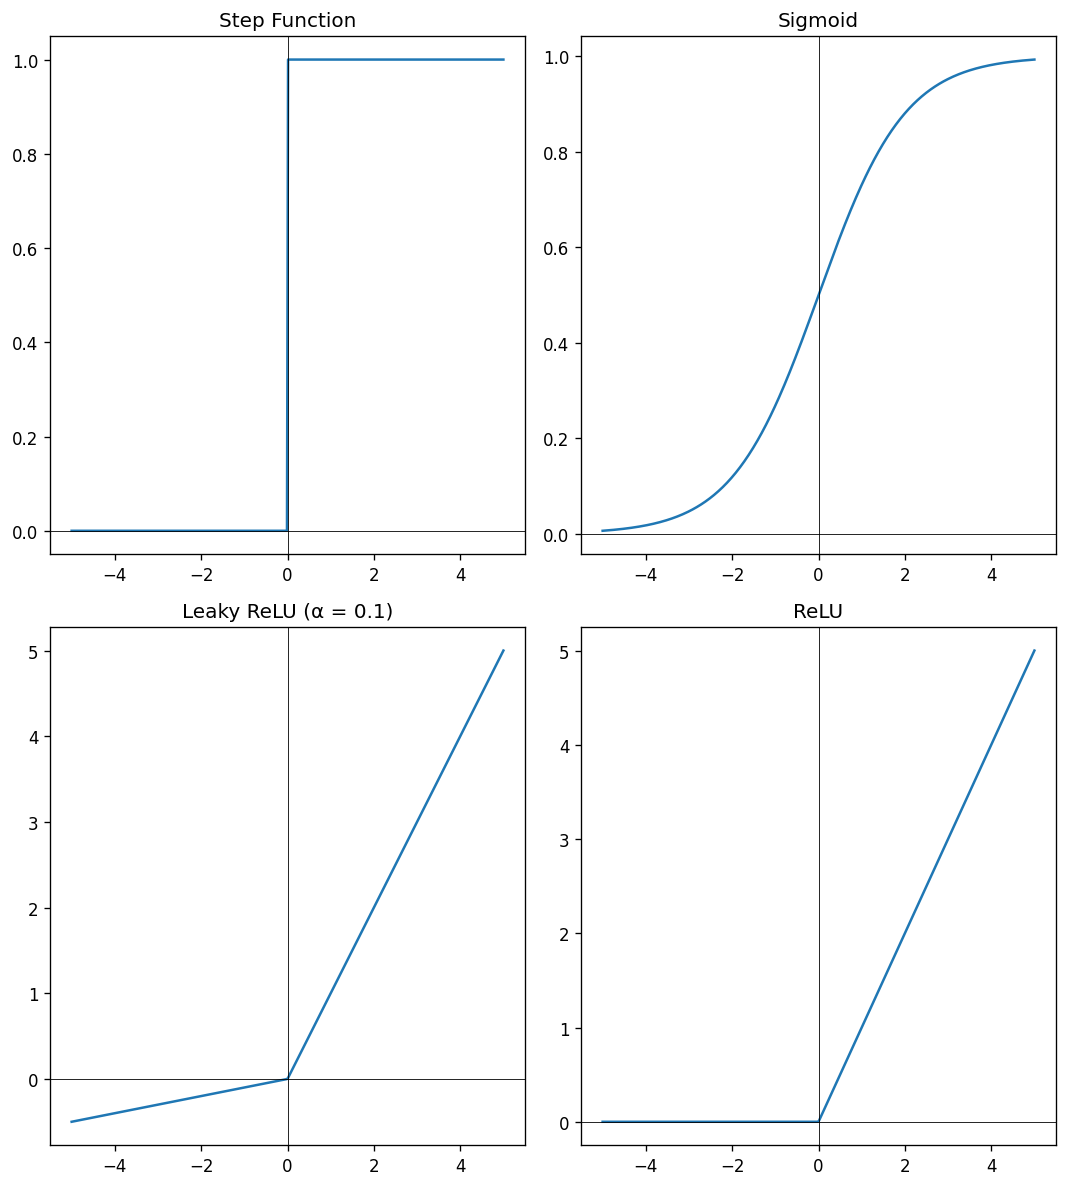

In [25]:
# Membuat domain x
x = torch.linspace(-5, 5, steps=400)

y_step   = step(x)
y_sig    = sigmoid(x)
y_relu   = relu_fn(x)
y_lrelu  = leaky_relu_fn(x, alpha=0.1)

fig, axs = plt.subplots(2, 2, figsize=(9, 10))

# Step
axs[0, 0].plot(x.numpy(), y_step.numpy())
axs[0, 0].set_title("Step Function")
axs[0, 0].axhline(0, color="black", linewidth=0.5)
axs[0, 0].axvline(0, color="black", linewidth=0.5)
axs[0, 0].grid(False)

# Sigmoid
axs[0, 1].plot(x.numpy(), y_sig.numpy())
axs[0, 1].set_title("Sigmoid")
axs[0, 1].axhline(0, color="black", linewidth=0.5)
axs[0, 1].axvline(0, color="black", linewidth=0.5)
axs[0, 1].grid(False)

# ReLU
axs[1, 1].plot(x.numpy(), y_relu.numpy())
axs[1, 1].set_title("ReLU")
axs[1, 1].axhline(0, color="black", linewidth=0.5)
axs[1, 1].axvline(0, color="black", linewidth=0.5)
axs[1, 1].grid(False)

# Leaky ReLU
axs[1, 0].plot(x.numpy(), y_lrelu.numpy())
axs[1, 0].set_title("Leaky ReLU (α = 0.1)")
axs[1, 0].axhline(0, color="black", linewidth=0.5)
axs[1, 0].axvline(0, color="black", linewidth=0.5)
axs[1, 0].grid(False)

plt.tight_layout()
plt.show()

## 4. Contoh Fungsi Aktivasi pada Tensor 4×4

Di sini kita menggunakan tensor 1 batch, 1 channel, ukuran 4×4
seperti contoh pooling, tapi dioperasikan dengan fungsi aktivasi.

In [17]:
# Membuat tensor 4×4 dengan nilai positif dan negatif
input_tensor = torch.tensor(
    [[[
        [-2.0, -1.0,  0.0,  1.0],
        [-3.0,  0.5,  2.0, -0.5],
        [ 1.5, -2.5,  3.0,  0.2],
        [ 0.0,  4.0, -1.5,  2.5]
    ]]]
)

print("Input Tensor Shape:", input_tensor.shape)
print("Input Tensor:\n", input_tensor)

# Menerapkan beberapa fungsi aktivasi
sig_out  = sigmoid(input_tensor)
relu_out = relu_fn(input_tensor)
lrelu_out = leaky_relu_fn(input_tensor, alpha=0.1)

print("\nOutput Sigmoid:\n", sig_out)
print("\nOutput ReLU:\n", relu_out)
print("\nOutput Leaky ReLU (α=0.1):\n", lrelu_out)

Input Tensor Shape: torch.Size([1, 1, 4, 4])
Input Tensor:
 tensor([[[[-2.0000, -1.0000,  0.0000,  1.0000],
          [-3.0000,  0.5000,  2.0000, -0.5000],
          [ 1.5000, -2.5000,  3.0000,  0.2000],
          [ 0.0000,  4.0000, -1.5000,  2.5000]]]])

Output Sigmoid:
 tensor([[[[0.1192, 0.2689, 0.5000, 0.7311],
          [0.0474, 0.6225, 0.8808, 0.3775],
          [0.8176, 0.0759, 0.9526, 0.5498],
          [0.5000, 0.9820, 0.1824, 0.9241]]]])

Output ReLU:
 tensor([[[[0.0000, 0.0000, 0.0000, 1.0000],
          [0.0000, 0.5000, 2.0000, 0.0000],
          [1.5000, 0.0000, 3.0000, 0.2000],
          [0.0000, 4.0000, 0.0000, 2.5000]]]])

Output Leaky ReLU (α=0.1):
 tensor([[[[-0.2000, -0.1000,  0.0000,  1.0000],
          [-0.3000,  0.5000,  2.0000, -0.0500],
          [ 1.5000, -0.2500,  3.0000,  0.2000],
          [ 0.0000,  4.0000, -0.1500,  2.5000]]]])


## 5. Layer Linear + Fungsi Aktivasi (Contoh 2D)

Kita buat beberapa titik 2D, lalu lewatkan ke:
 - Layer linear saja (tanpa aktivasi)
 - Layer linear + ReLU

sehingga terlihat perbedaan transformasi representasinya.


### Visualisasi Sebelum dan Sesudah ReLU

Kita plot:
 - Sebelum ReLU (bisa ada nilai negatif).
 - Sesudah ReLU (semua koordinat negatif menjadi 0).


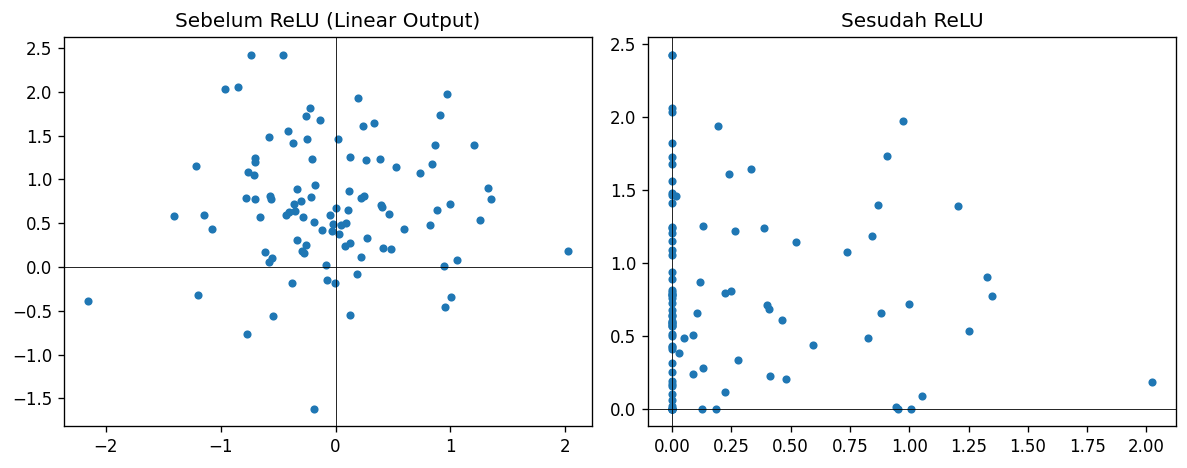

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Sebelum ReLU (z_linear)
axs[0].scatter(z_linear[:, 0].detach().numpy(), z_linear[:, 1].detach().numpy(), s=15)
axs[0].set_title("Sebelum ReLU (Linear Output)")
axs[0].axhline(0, color="black", linewidth=0.5)
axs[0].axvline(0, color="black", linewidth=0.5)
axs[0].grid(False)

# Sesudah ReLU
axs[1].scatter(a_relu[:, 0].detach().numpy(), a_relu[:, 1].detach().numpy(), s=15)
axs[1].set_title("Sesudah ReLU")
axs[1].axhline(0, color="black", linewidth=0.5)
axs[1].axvline(0, color="black", linewidth=0.5)
axs[1].grid(False)

plt.tight_layout()
plt.show()


# Buatlah dengan fungsi aktivasi yang lain sebagai contoh TanH, Softmax, dll. berikan minimal dua fungsi aktivasi